# Sale Analysis

#### Import necessary libraries

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import calendar

#### Merge 12 months of data into a single csv file

In [9]:
# df = pd.read_csv('./Sales Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales Data')]

all_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales Data/'+file)
    all_df = pd.concat([all_df, df])
    
all_df.to_csv('all_months_data.csv', index=False)

#### Read updated data into a dataframe

In [48]:
all_data = pd.read_csv('all_months_data.csv')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### Data Cleaning

In [49]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
all_data = all_data.dropna(how='all')

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Correcting data type

In [51]:
all_data['Month'] = all_data['Order Date'].str[0:2]
# all_data.head()
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float64')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Adding month column

In [52]:
all_data['Order Value'] = all_data['Price Each']*all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Sales by Month

In [71]:
sales_by_month = all_data.groupby('Month')[['Order Value']].sum()
sales_by_month['Order Value']

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Order Value, dtype: float64

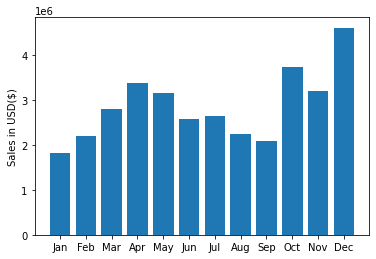

In [54]:
month = [calendar.month_abbr[i] for i in range(1,13)]

plt.bar(month, sales_by_month['Order Value'])
plt.ylabel('Sales in USD($)')
plt.show()

### Sale by city

In [63]:
def city(row):
    
    city=''
    length = len(row['Purchase Address'])
#     print(row['Purchase Address'])
    
    c=0
    
    for idx,i in enumerate(row['Purchase Address']):
        if i==',':
            c+=1
            for j in row['Purchase Address'][idx+2:length+1]:
                if j==',':
                    break
                else:
                    city+=j
        if c:
            break
            
    return city
                    

#### Adding city column

In [84]:
# all_data.info()
all_data['City'] = all_data['Purchase Address'].apply(lambda address:f"{address.split(',')[1]} ({address.split(',')[2].split()[0]})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [85]:
sales_by_city = all_data.groupby('City')[['Order Value']].sum()
sales_by_city

,Order Value
City,
Atlanta (GA),2.795499e+06
Austin (TX),1.819582e+06
Boston (MA),3.661642e+06
Dallas (TX),2.767975e+06
Los Angeles (CA),5.452571e+06
New York City (NY),4.664317e+06
Portland (ME),4.497583e+05
Portland (OR),1.870732e+06
San Francisco (CA),8.262204e+06


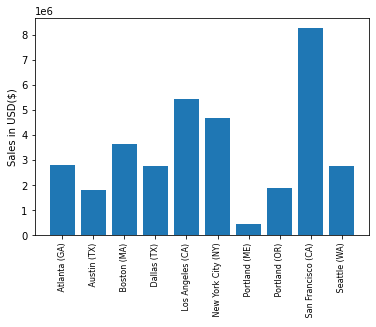

In [88]:
plt.bar(sales_by_city.index, sales_by_city['Order Value'])
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Sales in USD($)')
plt.show()

### Best time to advertise products

#### Adding hour and minutes column

In [89]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [94]:
order_by_time = all_data.groupby('Hour').count()
order_by_time

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


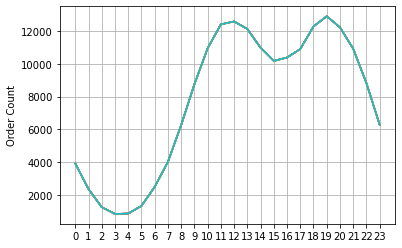

In [98]:
plt.plot(order_by_time.index, order_by_time)
plt.xticks(order_by_time.index)
plt.grid()
plt.ylabel('Order Count')
plt.show()

### Products often sold together

In [104]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

<ipython-input-104-1c07f86b9530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [113]:
from itertools import combinations
from collections import Counter

rows = df.Grouped
count = Counter()

for row in rows:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
[print(key,value) for key,value in count.most_common(10)]



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


[None, None, None, None, None, None, None, None, None, None]

In [114]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


### Most sold product and why?

In [119]:
sold_most = all_data.groupby('Product').sum()
sold_most[['Quantity Ordered']].sort_values(by='Quantity Ordered',ascending=False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


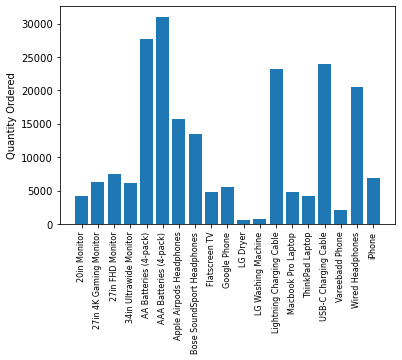

In [124]:
plt.bar(sold_most.index,sold_most['Quantity Ordered'])
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Quantity Ordered')
plt.show()

#### Overlay price data to justify most sold product

<ipython-input-139-a42cde1aec89>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sold_most.index,rotation='vertical',size=8)


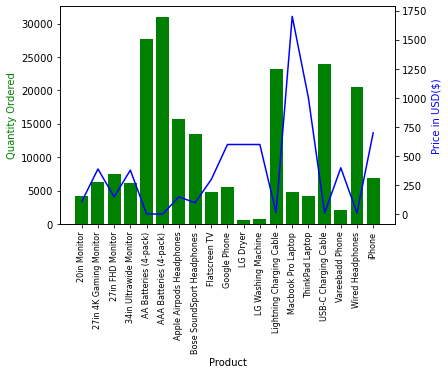

In [139]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(sold_most.index, sold_most['Quantity Ordered'], color = 'g')
ax2.plot(sold_most.index, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in USD($)', color='b')
ax1.set_xticklabels(sold_most.index,rotation='vertical',size=8)

plt.show()